In [10]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [11]:
# Load the movie dataset
movies = pd.read_csv('movies2.csv')  # contains movieId, title, genres

In [12]:
# Step 1: Preprocessing the data
# We'll use the 'genres' column to create feature vectors
# Replace '|' with space to use the genres in TfidfVectorizer
movies['genres'] = movies['genres'].str.replace('|', ' ')

In [13]:
# Step 2: Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
count_matrix = tfidf_vectorizer.fit_transform(movies['genres'])

In [14]:
# Step 3: Determine the optimal number of clusters using inertia
inertia = []
K = range(1, 10)

# Loop over 1 to 9 clusters and calculate inertia
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(count_matrix)
    inertia.append(kmeans.inertia_)

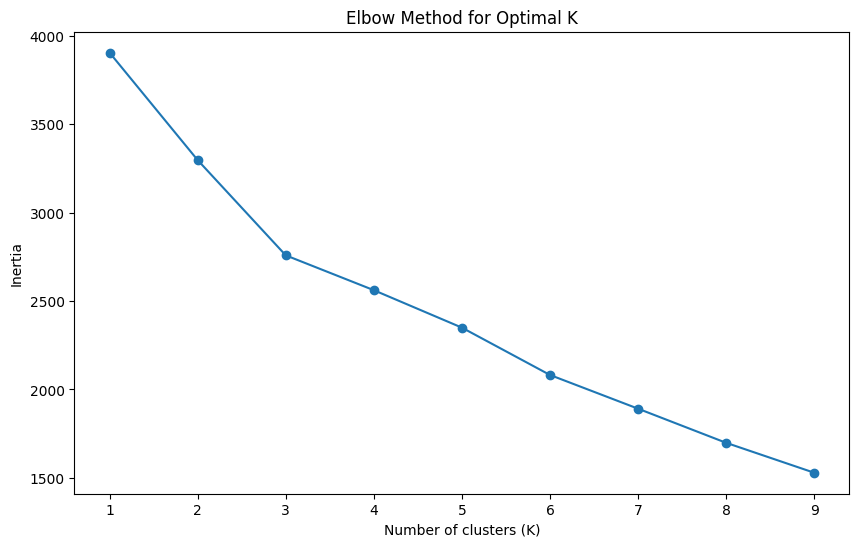

In [15]:
# Plotting the inertia to determine the elbow point
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [16]:
# Step 4: Clustering using K-Means with the optimal number of clusters (say 6)
optimal_clusters = 6
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
movies['cluster'] = kmeans.fit_predict(count_matrix)

In [17]:
# Step 5: Group movies into clusters
clustered_movies = {}
for i in range(optimal_clusters):
    clustered_movies[i] = movies[movies['cluster'] == i]['title'].tolist()

In [18]:
# Step 6: Display the movies in each cluster
for cluster_num, movie_list in clustered_movies.items():
    print(f"\nMovies in Cluster {cluster_num}:")
    print(movie_list[:5])  # Displaying only the top 5 movies in each cluster


Movies in Cluster 0:
['Nixon (1995)', 'Othello (1995)', 'Dangerous Minds (1995)', 'Cry, the Beloved Country (1995)', 'Richard III (1995)']

Movies in Cluster 1:
['Father of the Bride Part II (1995)', 'Four Rooms (1995)', 'Ace Ventura: When Nature Calls (1995)', 'It Takes Two (1995)', 'Big Green, The (1995)']

Movies in Cluster 2:
['Heat (1995)', 'Sudden Death (1995)', 'GoldenEye (1995)', 'Casino (1995)', 'Money Train (1995)']

Movies in Cluster 3:
['Grumpier Old Men (1995)', 'Waiting to Exhale (1995)', 'Sabrina (1995)', 'American President, The (1995)', 'Sense and Sensibility (1995)']

Movies in Cluster 4:
['Toy Story (1995)', 'Jumanji (1995)', 'Tom and Huck (1995)', 'Dracula: Dead and Loving It (1995)', 'Balto (1995)']

Movies in Cluster 5:
['Across the Sea of Time (1995)', 'Nico Icon (1995)', 'Heidi Fleiss: Hollywood Madam (1995)', 'Catwalk (1996)', 'Anne Frank Remembered (1995)']
